**By Aman Dubal**

# Import Libraries

In [32]:
import os
import cv2
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Import Images
600 Cats and Dogs Images

In [33]:


# Path to the datasets
cats_folder = "/content/Cats"
dogs_folder = "/content/Dogs"

# Function to load images and their labels
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (64, 64))  # Resize to 64x64
            img = img.flatten()  # Flatten the image into a vector
            images.append(img)
            labels.append(label)
    return images, labels

# Load cats and dogs images
cats_images, cats_labels = load_images_from_folder(cats_folder, "cat")
dogs_images, dogs_labels = load_images_from_folder(dogs_folder, "dog")

# Combine the images and labels
X = np.array(cats_images + dogs_images)
y = np.array(cats_labels + dogs_labels)

# Encode the labels (cat -> 0, dog -> 1)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


# Splitting Data And Setting Up Svm
Why Rbf : The RBF kernel is powerful for handling non-linear classification tasks, especially when the data cannot be separated by a linear hyperplane

In [34]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# Initialize and train the SVM classifier (using RBF (Radial Basis Function))
clf = svm.SVC(kernel='rbf', C=1, gamma='scale')
clf.fit(X_train, y_train)

clf2 = svm.SVC(kernel='linear', C=1, gamma='scale')
clf2.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)
y_pred2 = clf2.predict(X_test)

# Checking accuracy of Rbf and Linear
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the SVM classifier Rdf : {accuracy * 100:.2f}%")
accuracy2 = accuracy_score(y_test, y_pred2)
print(f"Accuracy of the SVM classifier Linear : {accuracy2 * 100:.2f}%")

Accuracy of the SVM classifier Rdf : 60.12%
Accuracy of the SVM classifier Linear : 50.60%


# Result

Accuracy of the SVM classifier: 60.12%


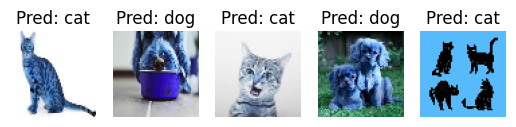

In [35]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the SVM classifier: {accuracy * 100:.2f}%")

# Visualize some test results
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_test[i].reshape(64, 64, 3))  # Reshape for display
    plt.title(f"Pred: {label_encoder.inverse_transform([y_pred[i]])[0]}")
    plt.axis('off')
plt.show()
